<h1 align = 'center'>Центральная предельная теорема своими руками</h1>
<h2 align = 'center'>Васильев Марат, 10 мая 2020</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as sts
from scipy.stats import genhalflogistic

<div>В качестве <i>"любимой"</i> была выбрана функция <a href = 'https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.genhalflogistic.html'>genhalflogistic</a></div>
<div>Для нее необходимо определить аргумент функции <u><i>с</i></u></div>

In [2]:
c = 0.772747278099

<div><h2 alaign = 'canter'>График плотности вероятности выбранной функции</h2></div>
<br>
<div> Выборка аргументов функции:</div>

In [3]:
x = np.linspace(genhalflogistic.ppf(0.001, c), genhalflogistic.ppf(0.999, c), 1000)

<div>Генерация выборки объемом 1000 элементов для построения гистограммы:</div>

In [4]:
r = genhalflogistic.rvs(c, size=1000)

<div>Построение распределения плотности и гистограммы:</div>
<div><br><u>При разработке использовался python 3.8 - <i>normed</i> заменена на <i>density</i>. См. комментарий в коде.</u></div>

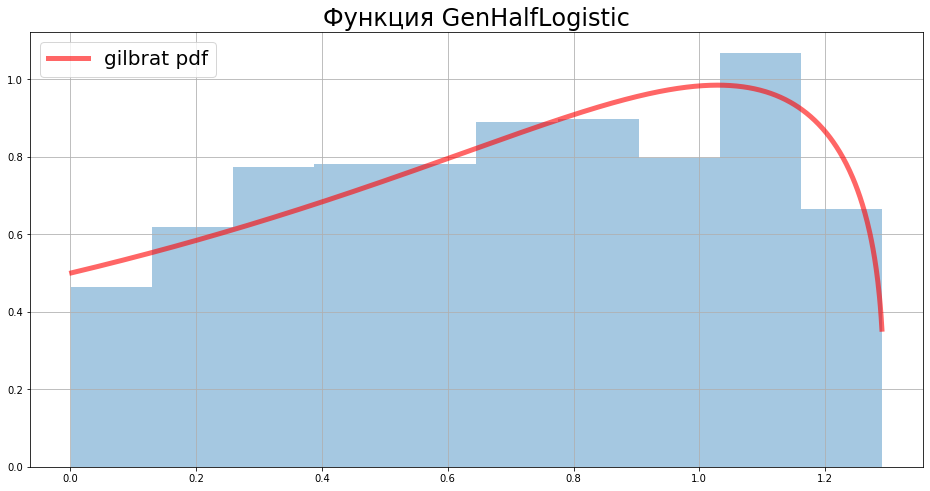

In [5]:
plt.figure(figsize = (16,8))
plt.grid(True)
plt.plot(x, genhalflogistic.pdf(x, c), 'r-', lw=5, alpha=0.6, label='gilbrat pdf')
plt.hist(r, density=True, alpha=0.4)
#--> HERE <--# plt.hist(r, normed=True, alpha=0.2)
plt.title('Функция GenHalfLogistic', fontsize = 24)
plt.legend(fontsize = 20)
plt.show()

<div><h2 align = 'center'>Исследовательская часть: оценка распределения выборочного среднего случайной величины при разных объёмах выборок</h2></div>

<div>Определение параметров выбранного распеделения:</div>

In [6]:
# для расчета параметров есть встроенные функции, поэтому я их использую:
# среднее и среднеквадратическое отклонение
ghl_mean = genhalflogistic.mean(c) 
ghl_std = genhalflogistic.std(c) 
print('GenHalfLogistic parameters:\nMean = {:5.3f}'.format(ghl_mean))
print('Standart deviation = {:5.3f}'.format(ghl_std));

GenHalfLogistic parameters:
Mean = 0.706
Standart deviation = 0.353


<br><div>Определение функции, которая будет возращать сгенерированный массив распределений для выборки из n элементов:</div>

In [7]:
def GetDistributionSamples(n = 2):
    samples = np.array([])
    for i in range(0,1000): 
        sample = genhalflogistic.rvs(c,0,1,n); #  получаем 5 значений из области определения
        # Формула: Выборочное среднее = (сумма выборочных медиан) / размер_выборки
        smean = sum(sample)/n;
        samples = np.append(samples, smean);
    return samples;

<div>Определение функции, которая строит графики:</div>

In [8]:
def Plotting(normal, my_funct, x_values, n_value = 2 ):
    plt.figure(figsize=(12,8))
    plt.plot(x_values, normal.pdf(x_values), label = 'Normal PDF (n={})'.format(n_value));
    plt.hist(my_funct, density = True, alpha = 0.4, label = 'distrib. hist.');
    plt.xlabel('x');
    plt.ylabel('samples quantity');
    plt.legend(fontsize = 20)
    plt.show();

<div><i><b>
    <div>Необходимо получить распределение:</div>
    <div>~N(EX, DX/n), </div>
    <div>где EX - матожидание, DX - дисперсия, n - кол-во эл-тов в выборке. Кроме того:</div>
    <div>Вспомним, что среднеквадратичное отклонение _std = sigma (в этой работе переобозначено в соответствие с англоязычными стандартами)</div>
    <div>sqrt(DX) = _std</div>
    <div>Тогда <u>sqrt(DX/n) = _std/sqrt(n)</u></div>
    <div>Далее это утверждение будет подтерждено совпадающими графиками функций</div>
    </b></i></div>

<div><h3> n  = 5 </h3></div>

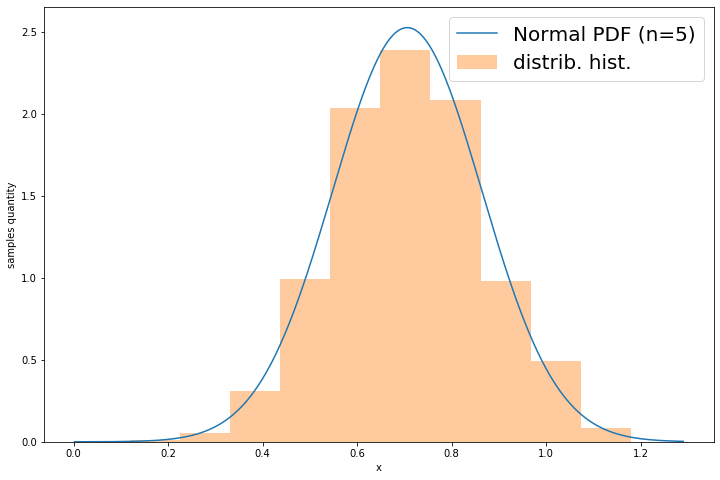

In [9]:
n = 5;
norm = sts.norm(ghl_mean, (ghl_std)/np.sqrt(n))
samples = GetDistributionSamples(n);
Plotting(norm, samples, x, n);

<div><h3> n  = 25 </h3></div>

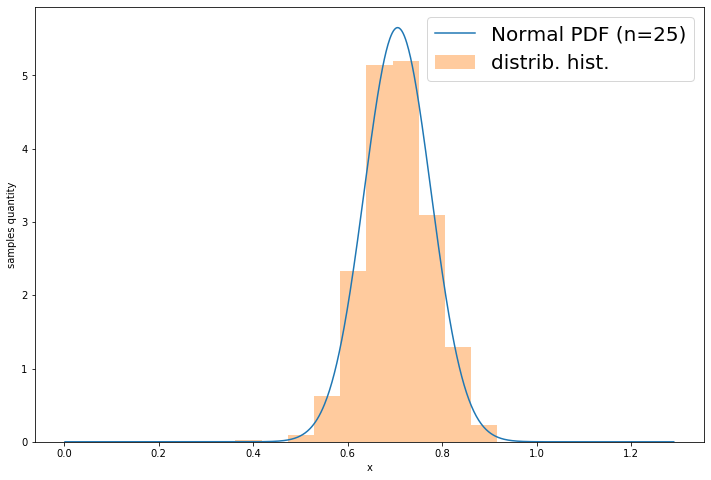

In [10]:
n = 25;
norm = sts.norm(ghl_mean, (ghl_std)/np.sqrt(n))
samples = GetDistributionSamples(n);
Plotting(norm, samples, x, n);

<div><h3> n  = 100 </h3></div>

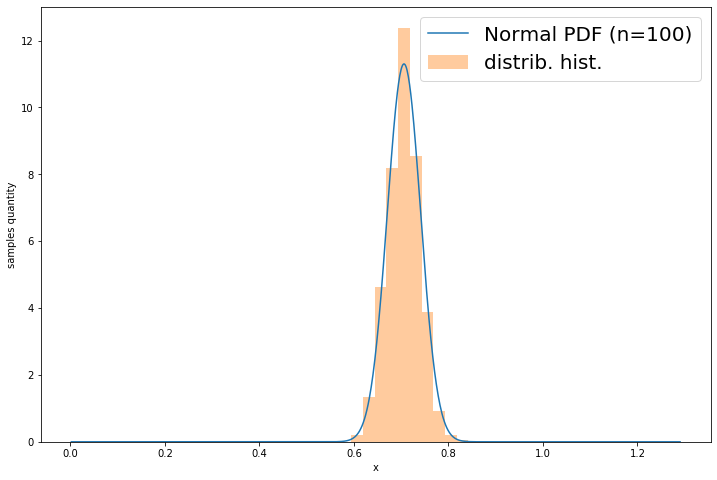

In [11]:
n = 100;
norm = sts.norm(ghl_mean, (ghl_std)/np.sqrt(n))
samples = GetDistributionSamples(n);
Plotting(norm, samples, x, n);

<h2 align = 'center'>Заключение</h2>
<br>
<div>Для задания была выбрана функция <a href='https://en.wikipedia.org/wiki/Generalized_logistic_distribution'>GenHalfLogistic</a>.  
    В ходе работы были построены гистограммы распределения для четырех разных величин выборок n (5, 25, 100) для 1000 случайных точек. 
    Исходя из теоретических данных для каждого n рассчитаны параметры распределений для построения нормальных распределений.</div><br>
<div>
По полученным графикам можно сделать вывод о том, что с увеличением размера выборки наблюдается увелечение точности апроксимации выборочного среднего значения непрерывной случайной величины описываемой выбранным распределением. Вид функции совпадает с видом построенной гитограммы достаточно хорошо, что говорит о хорошей совместимости выбранной функции с нормальным распределением и хорошей точности результатов.</div>
<div></div>
<div></div>